# WeatherPy
----

### Observations

- It does become hotter as it gets closer to the Equator.
    - A possible reason that it could be slightly hotter at around 20 degrees latitude in the northern Hemisphere is because of the Earth's 23.5 degree tilt.
    - Also, the southern hemisphere doesn't have as many data points beacuse there is much more land mass in the northern hemisphere, and therefore more cities.  We could generate coordinates using our methods, but they would land in the ocean much more often if the latitude is in the southern hemisphere.

- It appears to get more humid the further away from the equator a city is.

- It seems that more extreme wind speeds occur further away from the Equator.

- Cloudiness does not seem to be affected by distance from the Equator

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

#Access maps with gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#lat_lngs = zip(lats, lngs)
#list_lats_lngs = list(lat_lngs)
#print(list_lats_lngs)

641

In [4]:
#Seeing how spread out the coordinates are to ensure full coverage of the globe
#figure_layout = {
#    'width': '400px',
#    'height': '300px',
#    'border': '1px solid black',
#    'padding': '1px',
#    'margin': '0 auto 0 auto'}

#fig = gmaps.figure(layout=figure_layout)
#markers = gmaps.marker_layer(list_lats_lngs)
#fig.add_layer(markers)
#fig

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_sets = []
weather_list = []

for x in range(1,15):
    city_set = random.sample(cities, 50)
    city_sets.append(city_set)

print("Beginning Data Retrieval")
print("------------------------")    

weather_list = []
    
for city in cities:
        if len(weather_list) == 1000:
            print("End of Data Retrieval")
            break
        try:
            print(f"Processing Record {cities.index(city) + 1} | {city}")

            city_url = url + "appid=" + api_key + "&q=" + city
            response = requests.get(city_url)
            city_weather = response.json()    

            weather_list.append({
                "City": city_weather['name'],
                "Country": city_weather['sys']['country'],
                "Temperature": (city_weather['main']['temp'] - 273.15),
                "Humidity": city_weather['main']['humidity'],
                "Cloudiness": city_weather['clouds']['all'],
                "Max Temp": (city_weather['main']['temp_max'] - 273.15),
                "Wind Speed": city_weather['wind']['speed'],
                "Latitude": city_weather['coord']['lat'],
                "Longitude": city_weather['coord']['lon'],
                "Date": time.ctime(city_weather['dt'])
            })
        except KeyError:
            print("City not found.  Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 1 | qaanaaq
Processing Record 2 | ushuaia
Processing Record 3 | hermanus
Processing Record 4 | mayor pablo lagerenza
Processing Record 5 | artyk
City not found.  Skipping...
Processing Record 6 | albany
Processing Record 7 | chokurdakh
Processing Record 8 | berlevag
Processing Record 9 | new norfolk
Processing Record 10 | georgetown
Processing Record 11 | swan hill
Processing Record 12 | sao joao da barra
Processing Record 13 | narsaq
Processing Record 14 | mataura
Processing Record 15 | hilo
Processing Record 16 | tsihombe
City not found.  Skipping...
Processing Record 17 | lewistown
Processing Record 18 | taolanaro
City not found.  Skipping...
Processing Record 19 | rikitea
Processing Record 20 | hobart
Processing Record 21 | bredasdorp
Processing Record 22 | anshun
Processing Record 23 | palabuhanratu
City not found.  Skipping...
Processing Record 24 | naze
Processing Record 25 | clyde river
Processing Record 26 | t

Processing Record 225 | iqaluit
Processing Record 226 | walvis bay
Processing Record 227 | corona
Processing Record 228 | makakilo city
Processing Record 229 | naples
Processing Record 230 | chilca
Processing Record 231 | guerrero negro
Processing Record 232 | kavieng
Processing Record 233 | bubaque
Processing Record 234 | arlit
Processing Record 235 | mys shmidta
City not found.  Skipping...
Processing Record 236 | nikolskoye
Processing Record 237 | mackay
Processing Record 238 | flinders
Processing Record 239 | severo-kurilsk
Processing Record 240 | bambous virieux
Processing Record 241 | komsomolskiy
Processing Record 242 | nakhon thai
Processing Record 243 | lata
Processing Record 244 | ewo
Processing Record 245 | kodiak
Processing Record 246 | tigre
Processing Record 247 | quatre cocos
Processing Record 248 | egvekinot
Processing Record 249 | kununurra
Processing Record 250 | show low
Processing Record 251 | belmonte
Processing Record 252 | maniitsoq
Processing Record 253 | boyola

Processing Record 454 | byron bay
Processing Record 455 | flin flon
Processing Record 456 | mujiayingzi
Processing Record 457 | sangar
Processing Record 458 | ust-kuyga
Processing Record 459 | padang
Processing Record 460 | kirkwall
Processing Record 461 | dukat
Processing Record 462 | bururi
Processing Record 463 | tigzirt
Processing Record 464 | barkot
Processing Record 465 | ouallam
Processing Record 466 | lolua
City not found.  Skipping...
Processing Record 467 | gashua
Processing Record 468 | rapid valley
Processing Record 469 | novo aripuana
Processing Record 470 | revelstoke
Processing Record 471 | gigmoto
Processing Record 472 | ipixuna
Processing Record 473 | maarianhamina
City not found.  Skipping...
Processing Record 474 | numan
Processing Record 475 | matadi
Processing Record 476 | othonoi
City not found.  Skipping...
Processing Record 477 | belyy yar
Processing Record 478 | mbanza-ngungu
Processing Record 479 | port lincoln
Processing Record 480 | grand river south east
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame(weather_list)
weather_df['Temperature (F)'] = (weather_df['Temperature'] * (9/5)) + 32
weather_df['Max Temp (F)'] = (weather_df['Max Temp'] * (9/5)) + 32
weather_df.to_csv('City Weather.csv')

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Temperature,Wind Speed,Temperature (F),Max Temp (F)
0,Qaanaaq,97,GL,Fri Jul 12 13:19:07 2019,57,77.48,-69.36,8.652,8.652,4.12,47.5736,47.5736
1,Ushuaia,75,AR,Fri Jul 12 13:14:24 2019,80,-54.81,-68.31,5.000,4.570,2.10,40.2260,41.0000
2,Hermanus,58,ZA,Fri Jul 12 13:19:07 2019,80,-34.42,19.24,14.440,14.140,1.79,57.4520,57.9920
3,Mayor Pablo Lagerenza,13,PY,Fri Jul 12 13:19:07 2019,27,-19.93,-60.77,34.452,34.452,6.42,94.0136,94.0136
4,Albany,40,US,Fri Jul 12 13:19:08 2019,51,42.65,-73.75,27.780,24.740,5.10,76.5320,82.0040


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

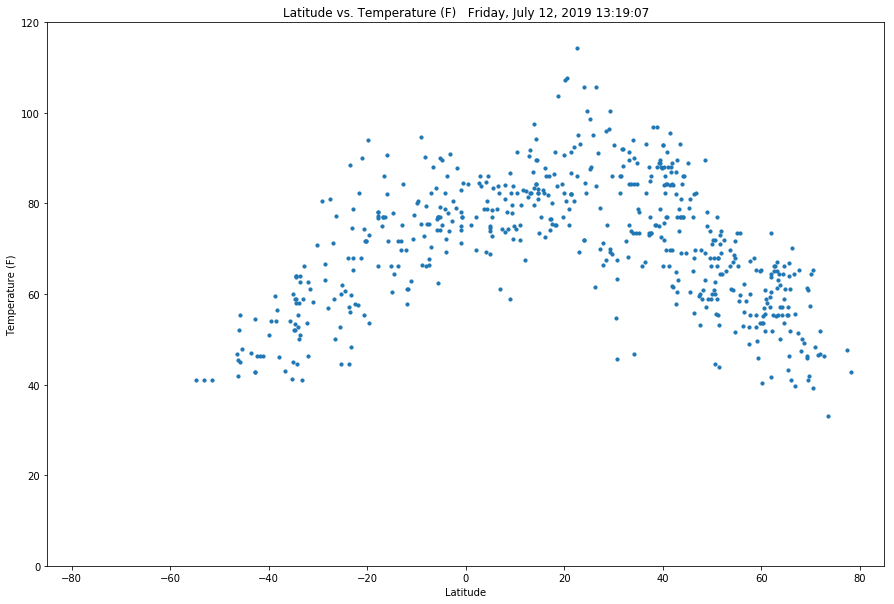

In [28]:
weather_df.plot(kind='scatter', x='Latitude', y='Max Temp (F)', figsize=(15,10), s=10)
plt.xlim(-85, 85)
plt.ylim(0, 120)
plt.title('Latitude vs. Temperature (F)   Friday, July 12, 2019 13:19:07')
plt.ylabel('Temperature (F)')
plt.savefig('Output_Files/Latitude_vs_Temperature.png')

#### Latitude vs. Humidity Plot

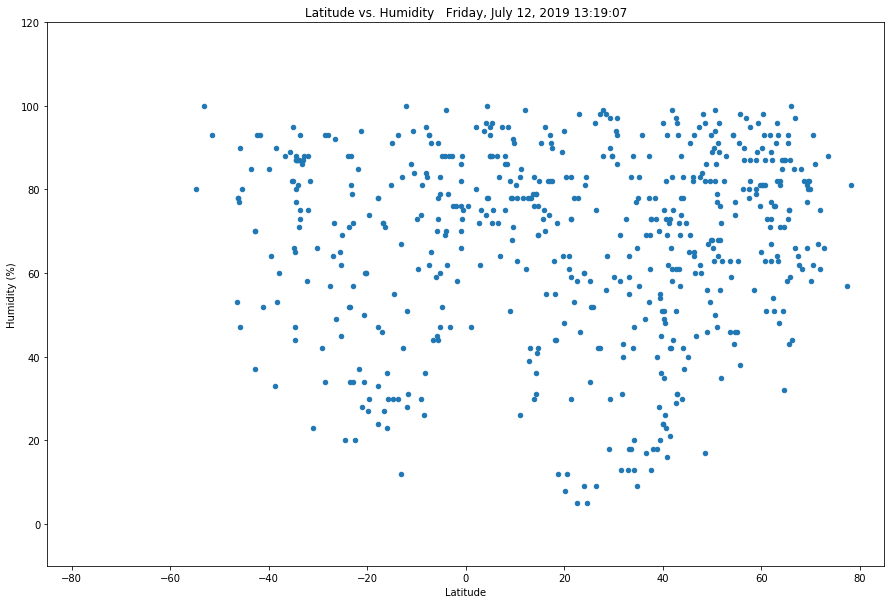

In [27]:
weather_df.plot(kind='scatter', x='Latitude', y='Humidity', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-10, 120)
plt.title('Latitude vs. Humidity   Friday, July 12, 2019 13:19:07')
plt.ylabel('Humidity (%)')
plt.savefig('Output_Files/Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

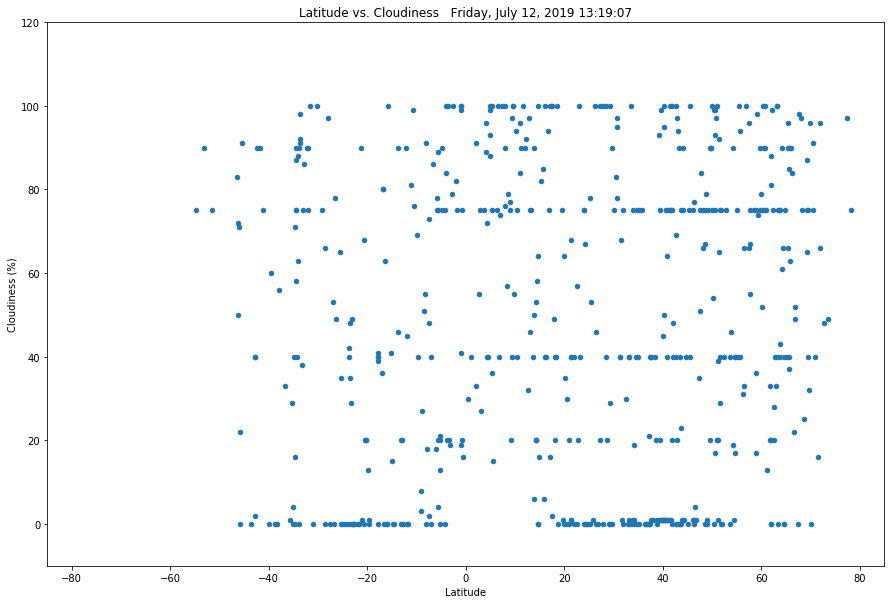

In [26]:
weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-10, 120)
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness   Friday, July 12, 2019 13:19:07')
plt.savefig('Output_Files/Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

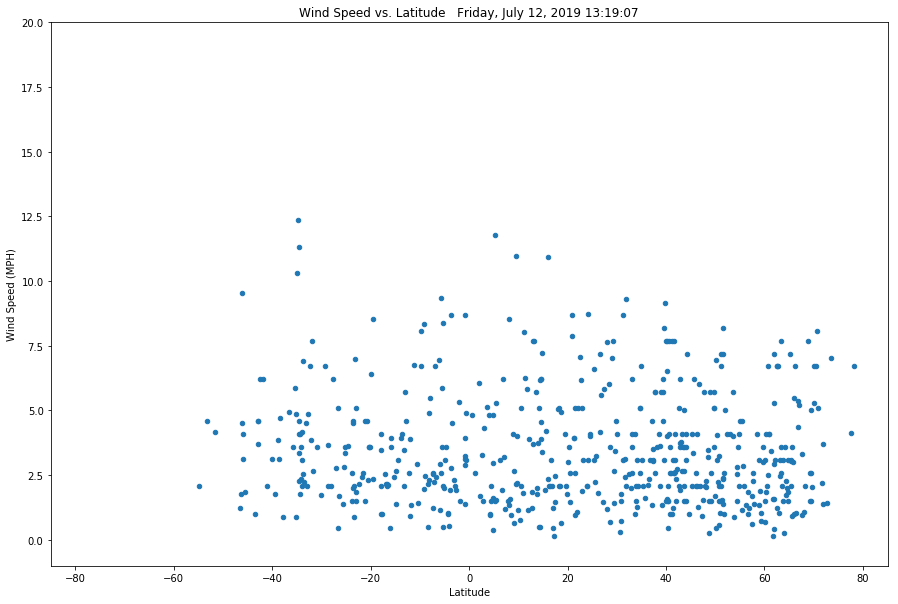

In [25]:
weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-1, 20)
plt.title('Wind Speed vs. Latitude   Friday, July 12, 2019 13:19:07')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('Output_Files/Latitude_vs_Wind_Speed.png')